# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [136]:
import pandas as pd
import requests
import json
from api_keys import weather_api_key
import matplotlib.pyplot as plt

# imports csv from citipy API
cities_data_df = pd.read_csv('worldcities.csv')
cities_data_df.head()

,Country,City,Latitude,Longitude
0,ad,andorra la vella,42.500000,1.516667
1,ad,canillo,42.566667,1.600000
2,ad,encamp,42.533333,1.583333
3,ad,la massana,42.550000,1.516667
4,ad,les escaldes,42.500000,1.533333


## Generate Cities List

In [137]:
cities = cities_data_df['City']

city_list_index = []

# appends a city index to city_list every 72 iterations
for city_index in range(len(cities)):
    if city_index % 72 == 0:
        city_list_index.append(city_index)

# converts city index to corresponding city name
city_list = cities_data_df['City'][city_list_index]
city_list = city_list.tolist()

# converts city_list to df
city_list_df = pd.DataFrame(city_list)
city_list_df.columns = ['City']

# adds new columns to df
city_list_df['Lat'] = ''
city_list_df['Lng'] = ''
city_list_df['Max Temp(F)'] = ''
city_list_df['Humidity(%)'] = ''
city_list_df['Cloudiness(%)'] = ''
city_list_df['Wind Speed(MPH)'] = ''
city_list_df['Country'] = ''
city_list_df['Date'] = ''
city_list_df.head()

,City,Lat,Lng,Max Temp(F),Humidity(%),Cloudiness(%),Wind Speed(MPH),Country,Date
0,andorra la vella,,,,,,,,
1,old road,,,,,,,,
2,agarakadzor,,,,,,,,
3,berd,,,,,,,,
4,lanjaghbyur,,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [138]:
# iterates through df rows
for index, row in city_list_df.iterrows():
    city_name = row['City']
    unit_measure = 'imperial'
    api_key = weather_api_key
    base_url = f'http://api.openweathermap.org/data/2.5/weather?q={city_name}&units={unit_measure}&appid={api_key}'
    
    city_weather = requests.get(base_url).json()
    
    # checks weather info for each city in df but doesn't break out of loop if there's a KeyError due to no city in API
    try:
        city_list_df.loc[index, 'Lat'] = city_weather['coord']['lat']
        city_list_df.loc[index, 'Lng'] = city_weather['coord']['lon']
        city_list_df.loc[index, 'Max Temp(F)'] = city_weather['main']['temp_max']
        city_list_df.loc[index, 'Humidity(%)'] = city_weather['main']['humidity']
        city_list_df.loc[index, 'Cloudiness(%)'] = city_weather['clouds']['all']
        city_list_df.loc[index, 'Wind Speed(MPH)'] = city_weather['wind']['speed']
        city_list_df.loc[index, 'Country'] = city_weather['sys']['country']
        city_list_df.loc[index, 'Date'] = city_weather['dt']
        print(f'{index} {city_name}')
    except KeyError:
        print(f'{index} {city_name} is not in the database')

0 andorra la vella
1 old road is not in the database
2 agarakadzor
3 berd
4 lanjaghbyur
5 shahumyan
6 nieuwpoort
7 mercedes
8 berndorf
9 knittelfeld
10 sankt veit
11 biloela
12 kempsey
13 sunbury
14 puta
15 coralici
16 mionica
17 travnik
18 jhikargachha is not in the database
19 as is not in the database
20 chastre
21 gembloux
22 kaprijke
23 merelbeke
24 retie
25 virton
26 kokologo
27 dve mogili
28 omurtag
29 veliki preslav
30 caracollo
31 santa barbara
32 altinopolis
33 araripe
34 barra velha
35 boquira
36 camacari
37 caraguatatuba
38 cianorte
39 cruzilia
40 exu
41 guajara
42 iguaba grande
43 itajuba
44 jacarei
45 juruti
46 manaquiri
47 miguelopolis
48 nao-me-toque is not in the database
49 ouro branco
50 patu
51 piraquara
52 presidente prudente
53 rio novo do sul
54 santa rita do sapucai
55 sao joao de pirabas
56 sarandi
57 taperoa
58 tupanatinga
59 vicosa
60 kobojango is not in the database
61 pinsk
62 blackfalds
63 claresholm
64 fenelon falls
65 humboldt
66 louisbourg is not in the

562 tabarqah is not in the database
563 canta
564 iskilip
565 patnos
566 penal
567 tainan
568 itumba
569 mahanje
570 mwanga
571 usoke
572 bolhrad
573 dovbysh
574 kalush
575 krasnodon
576 makoshyne
577 novomyrhorod
578 pidhaytsi
579 sarny
580 stebnyk
581 velyka oleksandrivka
582 zamhlay is not in the database
583 kisoro
584 madison
585 mesa
586 altadena
587 coalinga
588 grass valley
589 madera
590 placentia
591 santa rosa
592 windsor
593 coventry
594 new castle
595 forest city
596 miami beach
597 saint petersburg
598 centerville
599 thomasville
600 beach park
601 godfrey
602 palatine
603 bloomington
604 washington
605 newton
606 jefferson
607 old orchard beach
608 glen burnie
609 bedford
610 mansfield
611 walpole
612 hazel park
613 blaine
614 saint peter
615 creve coeur
616 great falls
617 farmington
618 bound brook
619 marlton
620 wanaque
621 cheektowaga
622 mastic
623 syosset
624 morganton
625 chillicothe
626 newark
627 willowick
628 hayesville
629 hermitage
630 ciales
631 jamestown
6

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [139]:
# drops rows that contains a city not in the API database
city_list_df = city_list_df[city_list_df.Lat != '']
city_list_df.reset_index(drop=True, inplace=True)

# exports data to a csv file
city_list_df.to_csv("City_List.csv")

city_list_df

,City,Lat,Lng,Max Temp(F),Humidity(%),Cloudiness(%),Wind Speed(MPH),Country,Date
0,andorra la vella,42.5,1.49,30.99,85,85,3,AD,1602909921
1,agarakadzor,39.73,45.35,48.2,70,0,6.93,AM,1602909655
2,berd,40.88,45.39,61.45,51,0,1.12,AM,1602909921
3,lanjaghbyur,40.27,45.14,48.2,76,0,0.96,AM,1602909921
4,shahumyan,39.94,44.57,48.2,76,0,1.05,AM,1602909922
5,nieuwpoort,51.12,2.77,37.99,93,77,1.12,BE,1602909922
6,mercedes,-34.65,-59.43,66.99,79,0,4,AR,1602909769
7,berndorf,47.95,16.11,45,92,100,7,AT,1602909922
8,knittelfeld,47.22,14.82,37.4,100,97,3.36,AT,1602909922
9,sankt veit,49.1,10.95,43,100,90,2.39,DE,1602909923


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [141]:
# checks to see if there are cities with humidity > 100%
over_100 = city_list_df.loc[city_list_df['Humidity(%)'] > 100]
over_100

,City,Lat,Lng,Max Temp(F),Humidity(%),Cloudiness(%),Wind Speed(MPH),Country,Date


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

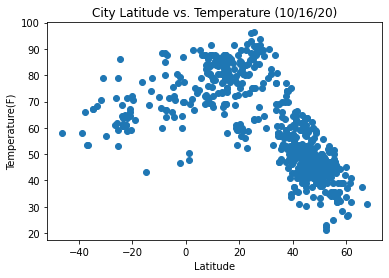

In [143]:
plt.scatter(city_list_df['Lat'], city_list_df['Max Temp(F)'])
plt.title('City Latitude vs. Temperature (10/16/20)')
plt.xlabel('Latitude')
plt.ylabel('Temperature(F)')
plt.show()

## Latitude vs. Humidity Plot

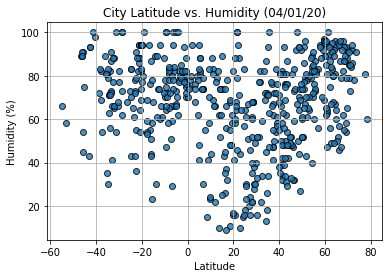

## Latitude vs. Cloudiness Plot

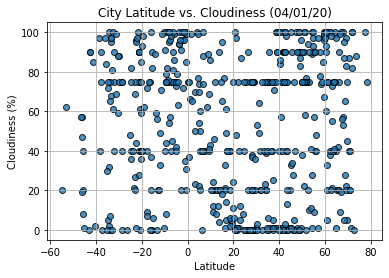

## Latitude vs. Wind Speed Plot

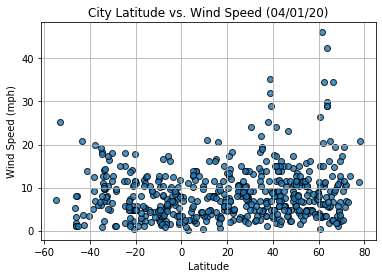

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


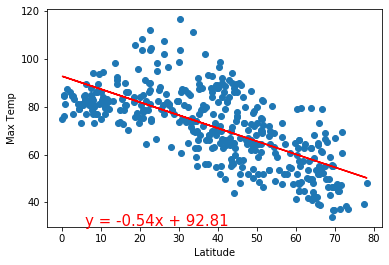

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


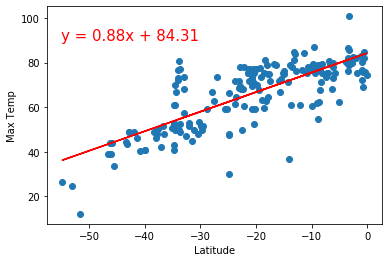

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


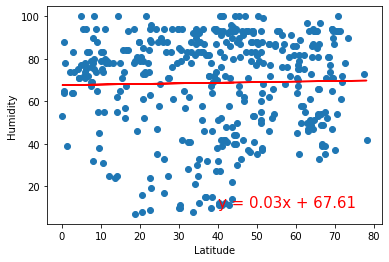

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


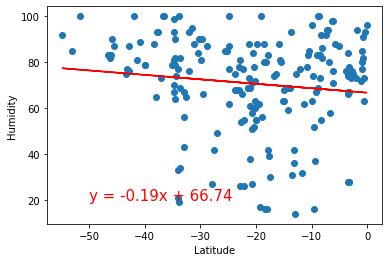

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


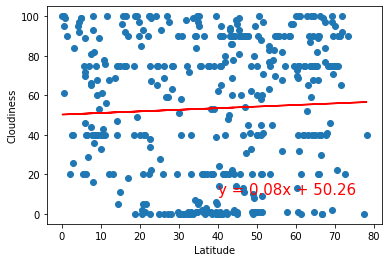

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


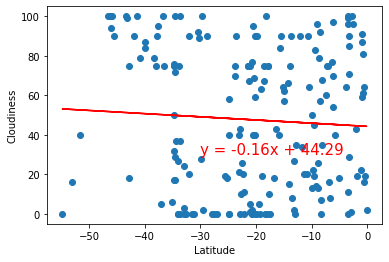

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


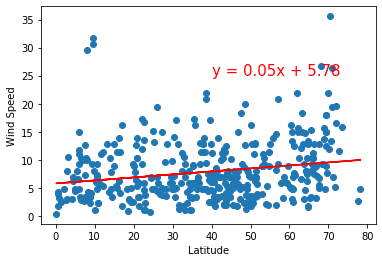

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


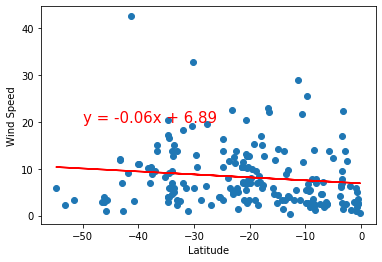